<a href="https://colab.research.google.com/github/finardi/tutos/blob/master/Gumbel_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sample_gumbel(n,k):
    unif = torch.distributions.Uniform(0,1).sample((n,k))
    g = -torch.log(-torch.log(unif))
    return g

In [ ]:
def sample_gumbel_softmax(pi, n, temperature):
    k = len(pi)
    g = sample_gumbel(n, k)
    h = (g + torch.log(pi))/temperature
    h_max = h.max(dim=1, keepdim=True)[0]
    h = h - h_max
    cache = torch.exp(h)
    # print(pi, torch.log(pi), intmdt)
    y = cache / cache.sum(dim=-1, keepdim=True)
    return y

# Probability Distribution

tensor([0.1724, 0.1598, 0.0233, 0.1741, 0.1293, 0.0072, 0.0072, 0.1329, 0.1203,
        0.0736])


(0.0, 1.0)

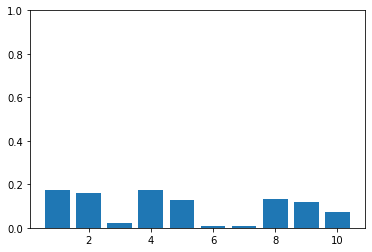

In [ ]:
k = 10
pi = torch.randint(high=100, size=(k,), dtype=torch.float)
pi = pi/pi.sum()
print(pi)
plt.bar(np.arange(k)+1, pi.numpy())
plt.ylim(0,1)

# Samples

## Gumbel-softmax

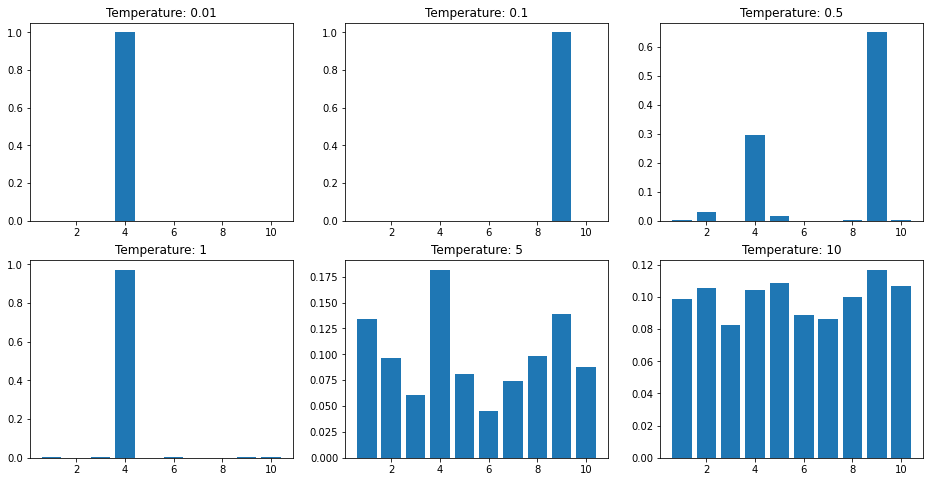

In [ ]:
n = 1
tau_vals = [0.01, 0.1, 0.5, 1, 5, 10]
plt.figure(figsize=(16,8))
for i in range(1, 7):
    plt.subplot(230+i)
    z = sample_gumbel_softmax(pi=pi, n=n, temperature=tau_vals[i-1])
    plt.bar(np.arange(k)+1, z.flatten().numpy())
    plt.title('Temperature: {}'.format(tau_vals[i-1]))
# plt.ylim(0,1)

## Categorical

In [ ]:
z

tensor([[0.0991, 0.1059, 0.0824, 0.1046, 0.1088, 0.0886, 0.0863, 0.1003, 0.1171,
         0.1069]])

z categorical: tensor([8.])
one_hot index: (range(0, 1), tensor([8]))


<BarContainer object of 10 artists>

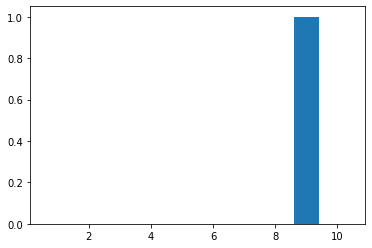

In [ ]:
z = torch.distributions.Categorical(probs=pi).sample((n,)).float()
print(f'z categorical: {z}')
one_hot = torch.zeros(n,k)
print(f'one_hot index: {range(n),z.long()}')
one_hot[range(n),z.long()] = 1
plt.bar(np.arange(k)+1, one_hot.mean(dim=0))
# plt.ylim(0,1)

# Expectation

## Gumbel-softmax

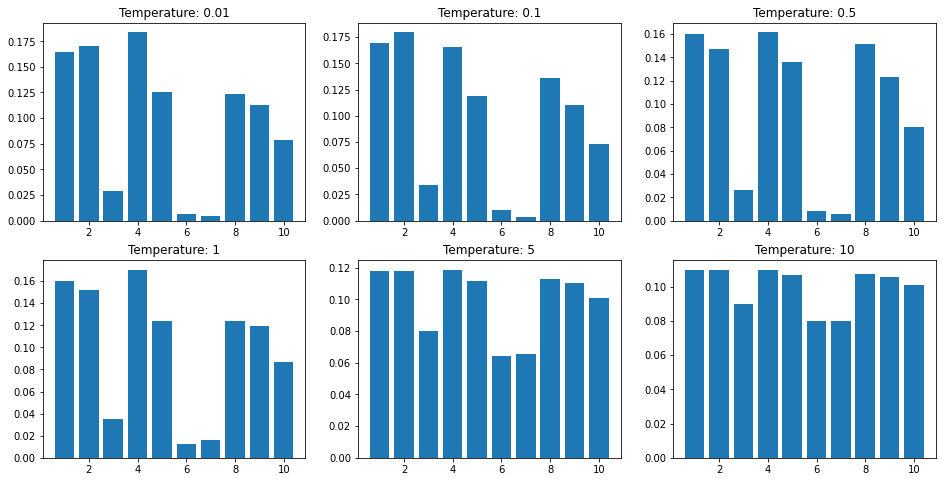

In [ ]:
n = 1000
tau_vals = [0.01, 0.1, 0.5, 1, 5, 10]
plt.figure(figsize=(16,8))
for i in range(1, 7):
    plt.subplot(230+i)
    z = sample_gumbel_softmax(pi=pi, n=n, temperature=tau_vals[i-1])
    plt.bar(np.arange(k)+1, z.mean(dim=0).numpy())
    plt.title('Temperature: {}'.format(tau_vals[i-1]))
# plt.ylim(0,1)

## Categorical

<BarContainer object of 10 artists>

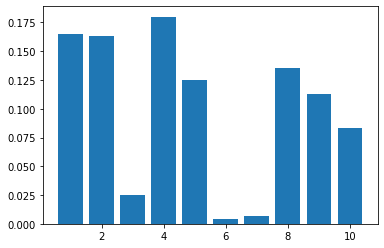

In [ ]:
z = torch.distributions.Categorical(probs=pi).sample((n,)).float()
one_hot = torch.zeros(n,k)
one_hot[range(n),z.long()] = 1
plt.bar(np.arange(k)+1, one_hot.mean(dim=0).numpy())
# plt.ylim(0,1)